In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터 수집 및 전처리

## 데이터 수집
* 국토교통부 실거래가 공개시스템<br>
http://rtdown.molit.go.kr/

In [3]:
df = pd.read_csv('data/아파트(매매)__실거래가_20211122131854.csv', encoding='cp949')
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,202108,12,"15,000",2,1997,경강로2539번길 8,NaN,-,-
1,강원도 강릉시 견소동,202,202,0,송정한신,84.945,202108,28,"25,000",1,1997,경강로2539번길 8,NaN,-,-
2,강원도 강릉시 견소동,202,202,0,송정한신,39.080,202108,28,"12,000",7,1997,경강로2539번길 8,NaN,-,-
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,59.990,202108,5,"22,700",5,2005,경강로2539번길 22,NaN,-,-
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,202108,9,"32,500",6,2005,경강로2539번길 22,NaN,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56238,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.890,202108,24,"41,000",5,2019,호암토성2로 1,NaN,-,-
56239,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,99.800,202108,27,"52,000",6,2019,호암토성2로 1,NaN,-,-
56240,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,84.960,202108,27,"42,500",2,2019,호암토성2로 1,NaN,-,-
56241,충청북도 충주시 호암동,1191,1191,0,호암힐데스하임,120.490,202108,31,"58,000",7,2019,호암토성2로 1,NaN,-,-


## 데이터 전처리

### 해제사유 발생일
* 해제사유 발생일 : 계약이 해지된 건에 대한 해지일

In [4]:
# 해제사유 발생일이 존재하는 데이터 삭제
df = df.drop(index=df[df['해제사유발생일'].notnull()].index)

In [5]:
df[df['해제사유발생일'].notnull()]

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지


### 사용할 컬럼만 추출
* 시군구, 전용면적(㎡), 거래금액(만원)

In [6]:
df = df[['시군구','전용면적(㎡)' ,'거래금액(만원)']]
df.head()

,시군구,전용면적(㎡),거래금액(만원)
0,강원도 강릉시 견소동,59.800,"15,000"
1,강원도 강릉시 견소동,84.945,"25,000"
2,강원도 강릉시 견소동,39.080,"12,000"
3,강원도 강릉시 견소동,59.990,"22,700"
4,강원도 강릉시 견소동,84.990,"32,500"


### 자료형 확인 및 변경

In [7]:
df.dtypes

시군구          object
전용면적(㎡)     float64
거래금액(만원)     object
dtype: object

In [8]:
# 전용면적 : int(소수점 무시)
df['전용면적(㎡)'] = df['전용면적(㎡)'].astype('int64')

In [9]:
# 거래금액 : int
df['거래금액(만원)'] = df['거래금액(만원)'].str.replace(',','').astype('int64')

In [10]:
df.dtypes

시군구         object
전용면적(㎡)      int64
거래금액(만원)     int64
dtype: object

# 시도별 아파트 매매가 데이터 추출

## 시도 컬럼 추가

In [11]:
df['시도'] = df['시군구'].str.split(' ').str[0]

In [12]:
df['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [13]:
df['시도'].nunique()

17

## 분석할 전용면적 선택

In [14]:
df['전용면적(㎡)'].value_counts()

84     16709
59     13125
49      2256
39      1288
74      1016
       ...  
211        1
185        1
239        1
225        1
243        1
Name: 전용면적(㎡), Length: 213, dtype: int64

## 분석할 전용면적 서브셋

In [15]:
df_84 = df[df['전용면적(㎡)']==84].copy()
df_84

,시군구,전용면적(㎡),거래금액(만원),시도
1,강원도 강릉시 견소동,84,25000,강원도
4,강원도 강릉시 견소동,84,32500,강원도
7,강원도 강릉시 견소동,84,31900,강원도
9,강원도 강릉시 교동,84,41000,강원도
14,강원도 강릉시 교동,84,37900,강원도
...,...,...,...,...
56236,충청북도 충주시 호암동,84,47700,충청북도
56237,충청북도 충주시 호암동,84,41800,충청북도
56238,충청북도 충주시 호암동,84,41000,충청북도
56240,충청북도 충주시 호암동,84,42500,충청북도


## 시도별 평균, 최대, 최소, 중간값 추출

In [16]:
df_84_mean = df_84.groupby('시도')['거래금액(만원)'].mean()
df_84_mean

시도
강원도         25735.603214
경기도         57935.884750
경상남도        30821.486979
경상북도        25636.574724
광주광역시       38281.782713
대구광역시       39517.411444
대전광역시       45900.591398
부산광역시       43642.905830
서울특별시      121650.927757
세종특별자치시     71412.643678
울산광역시       36790.119760
인천광역시       52835.016497
전라남도        23643.111987
전라북도        26839.718367
제주특별자치도     43831.702128
충청남도        26264.903790
충청북도        28915.154827
Name: 거래금액(만원), dtype: float64

In [17]:
df_84_max = df_84.groupby('시도')['거래금액(만원)'].max()

In [18]:
df_84_min = df_84.groupby('시도')['거래금액(만원)'].min()

In [19]:
df_84_median = df_84.groupby('시도')['거래금액(만원)'].median()

In [20]:
df_84_price = pd.concat([df_84_mean, df_84_max,df_84_min,df_84_median],axis=1)
df_84_price

,거래금액(만원),거래금액(만원),거래금액(만원),거래금액(만원)
시도,,,,
강원도,25735.603214,72500,7000,23700
경기도,57935.884750,220000,7400,52500
경상남도,30821.486979,109000,5300,28400
경상북도,25636.574724,64500,4000,25219
광주광역시,38281.782713,104500,10700,34000
대구광역시,39517.411444,148000,13700,35900
대전광역시,45900.591398,127000,12500,44435
부산광역시,43642.905830,183000,9400,38000
서울특별시,121650.927757,384500,29500,109000


In [21]:
df_84_price.columns = ['평균','최대','최소','중간']

In [22]:
df_84_price = df_84_price.sort_values('평균', ascending=False)

In [23]:
df_84_price['평균'] = round(df_84_price['평균'],1)
df_84_price

,평균,최대,최소,중간
시도,,,,
서울특별시,121650.9,384500,29500,109000
세종특별자치시,71412.6,119000,23800,74000
경기도,57935.9,220000,7400,52500
인천광역시,52835.0,130000,16700,47500
대전광역시,45900.6,127000,12500,44435
제주특별자치도,43831.7,95000,13500,42750
부산광역시,43642.9,183000,9400,38000
대구광역시,39517.4,148000,13700,35900
광주광역시,38281.8,104500,10700,34000


# 시도별 아파트 매매가 현황 시각화
* 다중막대그래프

In [24]:
import numpy as np
x_index = np.arange(1,len(df_84_price)+1)
x_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

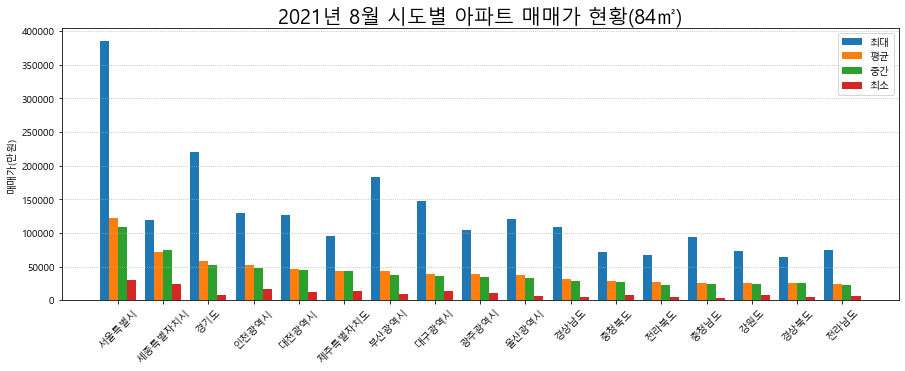

In [25]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(x_index-0.3, df_84_price['최대'], width=0.2, label='최대')
plt.bar(x_index-0.1, df_84_price['평균'], width=0.2, label='평균')
plt.bar(x_index+0.1, df_84_price['중간'], width=0.2, label='중간')
plt.bar(x_index+0.3, df_84_price['최소'], width=0.2, label='최소')
plt.legend()
plt.xticks(x_index, labels=df_84_price.index, rotation=45)
plt.grid(axis='y', ls=':')
plt.title('2021년 8월 시도별 아파트 매매가 현황(84㎡)', size=20)
plt.ylabel('매매가(만원)')
plt.show()


# 서울시 아파트 매매가 분포

## 서울시 서브셋

In [26]:
df_84_seoul = df_84[df_84['시도']=='서울특별시'].copy()
df_84_seoul

,시군구,전용면적(㎡),거래금액(만원),시도
35560,서울특별시 강남구 개포동,84,285000,서울특별시
35561,서울특별시 강남구 개포동,84,275000,서울특별시
35567,서울특별시 강남구 개포동,84,289000,서울특별시
35573,서울특별시 강남구 개포동,84,298000,서울특별시
35583,서울특별시 강남구 개포동,84,77000,서울특별시
...,...,...,...,...
39823,서울특별시 중랑구 신내동,84,75000,서울특별시
39824,서울특별시 중랑구 신내동,84,73500,서울특별시
39828,서울특별시 중랑구 중화동,84,90000,서울특별시
39833,서울특별시 중랑구 중화동,84,88000,서울특별시


## 구 컬럼 추가

In [27]:
df_84_seoul['구'] = df_84_seoul['시군구'].str.split(' ').str[1]
df_84_seoul

,시군구,전용면적(㎡),거래금액(만원),시도,구
35560,서울특별시 강남구 개포동,84,285000,서울특별시,강남구
35561,서울특별시 강남구 개포동,84,275000,서울특별시,강남구
35567,서울특별시 강남구 개포동,84,289000,서울특별시,강남구
35573,서울특별시 강남구 개포동,84,298000,서울특별시,강남구
35583,서울특별시 강남구 개포동,84,77000,서울특별시,강남구
...,...,...,...,...,...
39823,서울특별시 중랑구 신내동,84,75000,서울특별시,중랑구
39824,서울특별시 중랑구 신내동,84,73500,서울특별시,중랑구
39828,서울특별시 중랑구 중화동,84,90000,서울특별시,중랑구
39833,서울특별시 중랑구 중화동,84,88000,서울특별시,중랑구


In [28]:
df_84_seoul['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [29]:
df_84_seoul['구'].nunique()

25

## 박스플롯으로 시각화

### 구별 데이터 분리

In [30]:
# 구이름
seoul_gu = df_84_seoul['구'].unique()
seoul_gu

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [31]:
df_seoul_gu = []
for i in range(len(seoul_gu)):
    df_seoul_gu.append(df_84_seoul.groupby('구')['거래금액(만원)'].get_group(seoul_gu[i]))

### 박스플롯으로 시각화

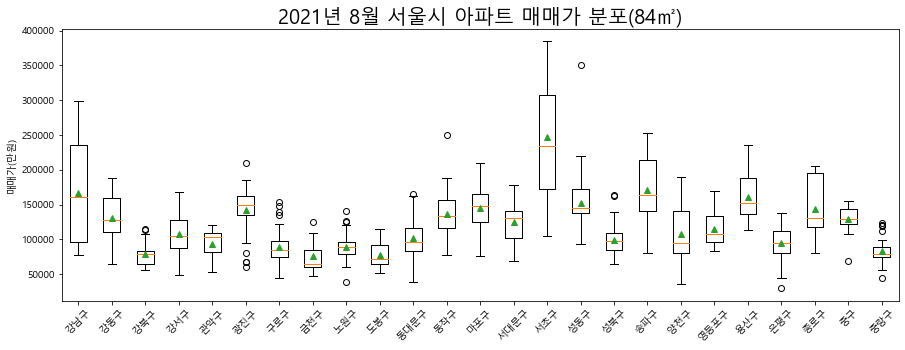

In [32]:
plt.boxplot(df_seoul_gu, labels=seoul_gu, showmeans=True)
plt.xticks(rotation=45)
plt.ylabel('매매가(만원)')
plt.title('2021년 8월 서울시 아파트 매매가 분포(84㎡)',size=20)
plt.show()

# 서울시 아파트 구별 평균 매매가, 거래건수

## 서울시 아파트 구별 평균 매매가

In [33]:
df_84_seoul_mean = df_84_seoul.groupby('구')['거래금액(만원)'].mean()
df_84_seoul_mean =  round(df_84_seoul_mean,1)
df_84_seoul_mean

구
강남구     166324.5
강동구     130831.1
강북구      78541.3
강서구     107935.7
관악구      94022.2
광진구     141525.0
구로구      89275.4
금천구      75415.4
노원구      89126.3
도봉구      77755.1
동대문구    102024.5
동작구     136100.0
마포구     145163.1
서대문구    124358.7
서초구     246792.5
성동구     152622.2
성북구      99480.3
송파구     171039.4
양천구     107729.2
영등포구    115432.1
용산구     161473.7
은평구      94170.7
종로구     143280.0
중구      129078.6
중랑구      82726.4
Name: 거래금액(만원), dtype: float64

## 서울시 아파트 구별 거래건수

In [34]:
df_84_seoul_count = df_84_seoul.groupby('구')['거래금액(만원)'].count()
df_84_seoul_count.sort_values()

구
종로구      12
중구       14
용산구      19
금천구      26
광진구      32
관악구      36
서초구      40
강북구      46
양천구      48
도봉구      49
동대문구     49
서대문구     52
중랑구      53
영등포구     53
구로구      57
노원구      57
은평구      58
마포구      61
강동구      61
동작구      63
송파구      71
성동구      72
강남구      84
강서구      98
성북구     104
Name: 거래금액(만원), dtype: int64

In [35]:
df_84_seoul_mean_count = pd.concat([df_84_seoul_mean, df_84_seoul_count], axis=1)
df_84_seoul_mean_count

,거래금액(만원),거래금액(만원)
구,,
강남구,166324.5,84
강동구,130831.1,61
강북구,78541.3,46
강서구,107935.7,98
관악구,94022.2,36
광진구,141525.0,32
구로구,89275.4,57
금천구,75415.4,26
노원구,89126.3,57


In [36]:
df_84_seoul_mean_count.columns=['평균매매가(만원)', '거래건수']
df_84_seoul_mean_count = df_84_seoul_mean_count.sort_values('평균매매가(만원)', ascending=False)
df_84_seoul_mean_count

,평균매매가(만원),거래건수
구,,
서초구,246792.5,40
송파구,171039.4,71
강남구,166324.5,84
용산구,161473.7,19
성동구,152622.2,72
마포구,145163.1,61
종로구,143280.0,12
광진구,141525.0,32
동작구,136100.0,63


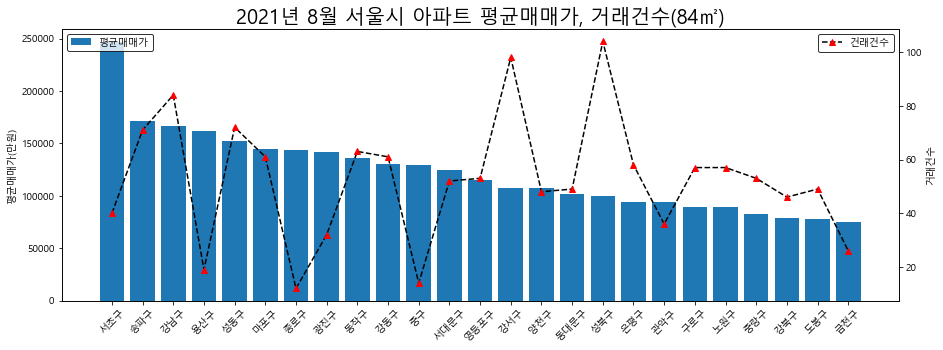

In [37]:
fig, ax1 = plt.subplots()
ax1.bar(df_84_seoul_mean_count.index, df_84_seoul_mean_count['평균매매가(만원)'], label='평균매매가')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(df_84_seoul_mean_count['거래건수'], 'k^--', mfc='r', mec='r', label='건래건수')

ax1.legend(loc='upper left', edgecolor='k')
ax2.legend(loc='upper right', edgecolor='k')

ax1.set_ylabel('평균매매가(만원)')
ax2.set_ylabel('거래건수')

plt.title('2021년 8월 서울시 아파트 평균매매가, 거래건수(84㎡)', size=20)
plt.show()